In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kosur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kosur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
!pip install textblob
import nltk
nltk.download('stopwords')
nltk.download('punkt')


Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kosur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kosur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Reviews.csv', nrows =500)

df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [5]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [6]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [7]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import pandas as pd

# Convert text to lowercase
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Replace non-alphanumeric characters with spaces
df['Text'] = df['Text'].replace('[^\w\s]', ' ', regex=True)

# Remove stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Correct spelling using TextBlob
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

# Lemmatize words
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Display the first few rows of the cleaned text
df.Text.head()


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanut p...
2    connection around century light pillow city ge...
3    looking secret ingredient robitussin believe f...
4    great staff great price wide assortment mummy ...
Name: Text, dtype: object

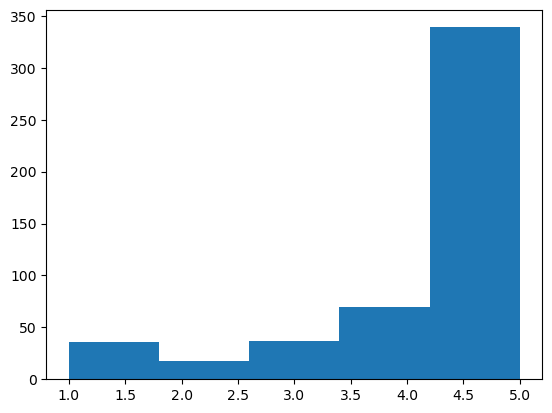

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [8]:
reviews = df

reviews.dropna(inplace=True)

reviews.Score.hist(bins=5 , grid =False)
plt.show()
print(reviews.groupby('Score').count().Id)


In [9]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

In [10]:
reviews_sample= pd.concat([score_1,score_2,score_3,score_4,score_5],axis =0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


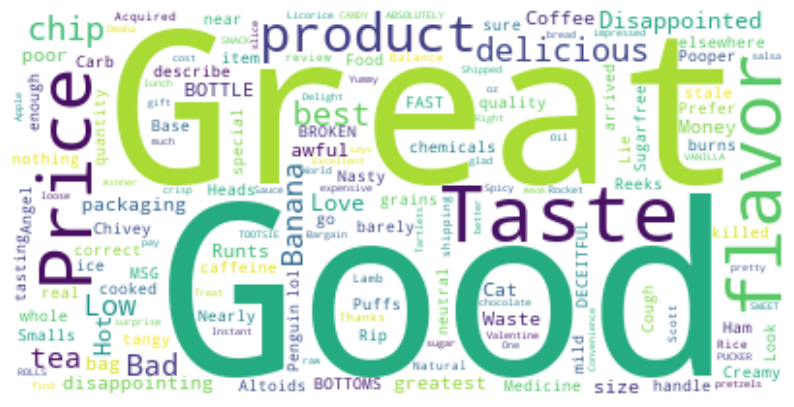

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [16]:
negative_reviews = reviews_sample[reviews_sample['Score'] <= 3]

positive_reviews = reviews_sample[reviews_sample['Score'] >= 4]



negative_reviews_str = negative_reviews.Text.str.cat()

positive_reviews_str = positive_reviews.Text.str.cat()

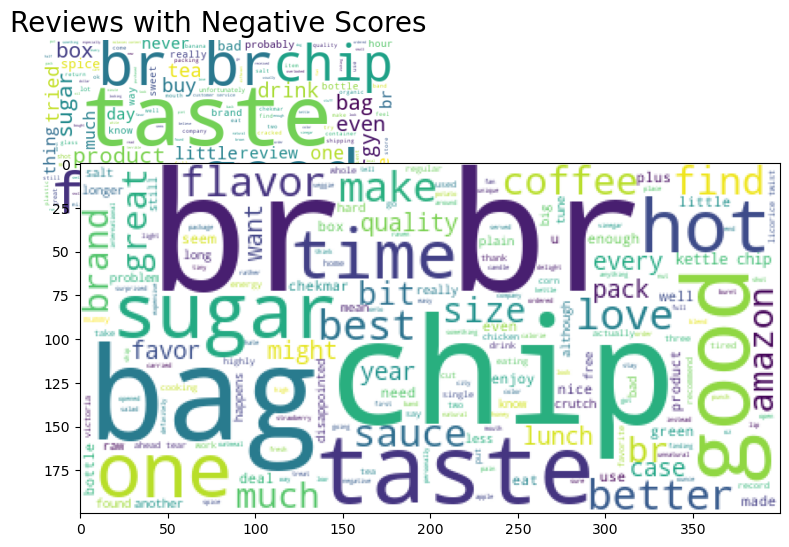

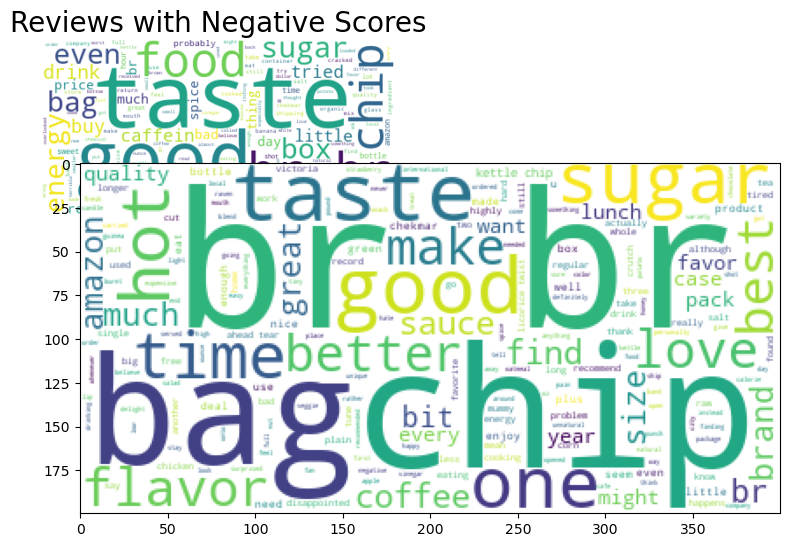

In [17]:
#Create wordclouds
wordcloud_negative = WordCloud(background_color ='White')\
  .generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color ='White')\
  .generate(positive_reviews_str)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax1.imshow(wordcloud_negative,interpolation ='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive)#Create wordclouds
wordcloud_negative = WordCloud(background_color ='White')\
  .generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color ='White')\
  .generate(positive_reviews_str)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax1.imshow(wordcloud_negative,interpolation ='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive)

In [18]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 222.6 kB/s eta 0:00:01
   ----------------------------------- ---- 112.6/126.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 925.7 kB/s eta 0:00:00


In [19]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
cp = sns.color_palette()
analyser = SentimentIntensityAnalyzer()
emptyline = []
for row in df['Text']:
    vs = analyser.polarity_scores(row)
    emptyline.append(vs) 

In [20]:
df_sentiments = pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.134,0.602,0.264,0.7880
3,0.000,0.854,0.146,0.4404
4,0.000,0.455,0.545,0.9186


In [21]:
df_c = pd.concat([df.reset_index(drop=True),df_sentiments],axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanut p...,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",connection around century light pillow city ge...,0.134,0.602,0.264,0.7880


In [22]:
df_c["Sentiment"] = np.where(df_c["compound"] >= 0, "Positive","Negative")
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanut p...,0.258,0.644,0.099,-0.5719,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",connection around century light pillow city ge...,0.134,0.602,0.264,0.7880,Positive


Positive    459
Negative     41
Name: Sentiment, dtype: int64


<Axes: >

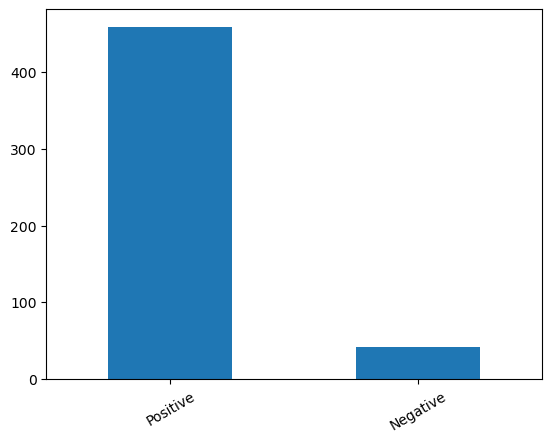

In [23]:
result=df_c["Sentiment"].value_counts()
print(result)
result.plot(kind="bar",rot=30)